In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1- Momentum

In [4]:
# Data 
X = np.linspace(0,30,100)
a = -2
b = 1
Y = [a*xi + b for xi in X]

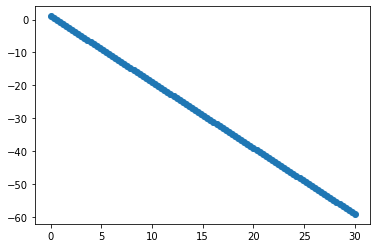

In [37]:
plt.scatter(X,Y, marker='o')
plt.show()

In [50]:
def Momentum_based_GD(X,Y, alpha=0.0001, gamma= 0.9, iterat=1000, threshold=0.001):
    
    theta_0 = theta_1 = 0.0
    v0 = v1 = 0.0
    m = len(X)
    theta_0_values = []
    theta_1_values = []
    cost = []
    iterations = 0
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error.T @ X) / m
        
        v0 = gamma * v0 + alpha * theta_0_grad
        v1 = gamma* v1 + alpha * theta_1_grad
        
        theta_0 = theta_0 - v0
        theta_1 = theta_1 - v1
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
       
        
        iterations += 1
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [51]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = Momentum_based_GD(X,Y)
print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  -0.0744764735409707 , -1.961358148430239  ]
Takes:  93  Iterations


In [52]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.88266144224342 %


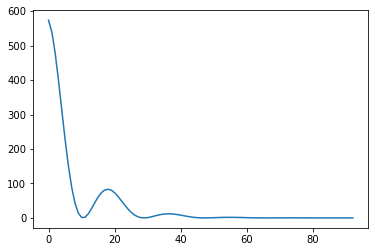

In [53]:
plt.plot(np.arange(iterations), cost)
plt.show()

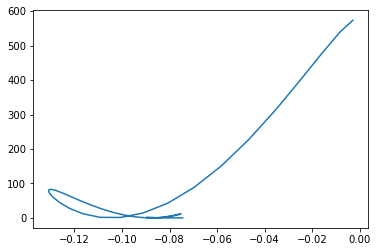

In [54]:
plt.plot(theta_0_values, cost)
plt.show()

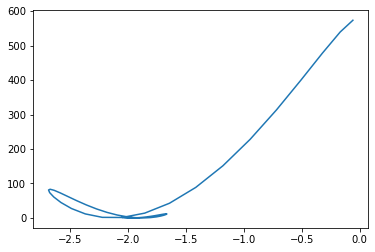

In [55]:
plt.plot(theta_1_values, cost)
plt.show()

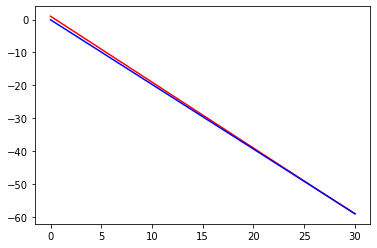

In [56]:
plt.plot(X,Y, 'r')
y_pred =  theta_0_opt + theta_1_opt * X
plt.plot(X, y_pred, 'b')
plt.show()

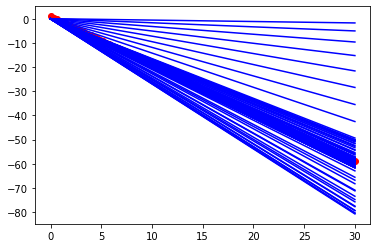

In [57]:
plt.scatter(X,Y, color='red')
for i in range(0, len(theta_0_values)):
    y_pred =  theta_0_values[i] + theta_1_values[i] * X
    plt.plot(X, y_pred, 'b')
plt.show()

## 2- NAG

In [30]:
def NAG(X,Y, alpha=0.0001, gamma= 0.8, iterat=1000, threshold=0.001):
    
    theta_0 = theta_1 = 0.0
    theta_0_temp = theta_1_temp = 0.0
    v0 = v1 = 0.0
    m = len(X)
    theta_0_values = []
    theta_1_values = []
    cost = []
    iterations = 0
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        
        
        theta_0_temp = theta_0 - gamma * v0
        theta_1_temp = theta_1 - gamma * v1 
           
        ypred_temp = theta_0_temp + theta_1_temp * X
        error_temp = ypred_temp - Y
        
        theta_0_temp_grad = (np.sum(error_temp)) / m
        theta_1_temp_grad = (error_temp.T@ X) / m
        
        v0 = gamma * v0 + alpha * theta_0_temp_grad
        v1 = gamma * v1 + alpha * theta_1_temp_grad
        
        theta_0 = theta_0_temp - alpha * theta_0_temp_grad
        theta_1 = theta_1_temp - alpha * theta_1_temp_grad
        
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
        iterations += 1
        
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [31]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = NAG(X,Y)
print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  -0.0916424046139177 , -1.9437795457277507  ]
Takes:  41  Iterations


In [32]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.90083172429999 %


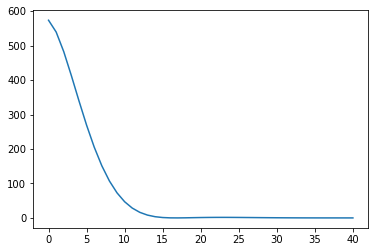

In [33]:
plt.plot(np.arange(iterations), cost)
plt.show()

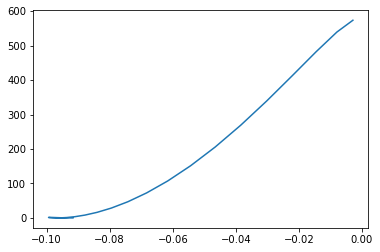

In [34]:
plt.plot(theta_0_values, cost)
plt.show()

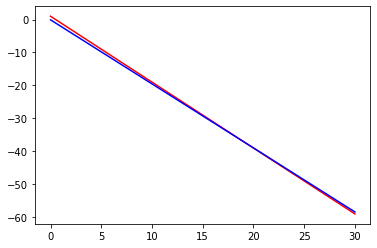

In [35]:
plt.plot(X,Y, 'r')
y_pred =  theta_0_opt + theta_1_opt * X
plt.plot(X, y_pred, 'b')
plt.show()

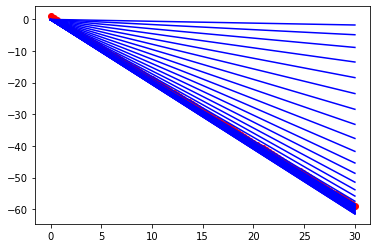

In [36]:
plt.scatter(X,Y, color='red')
for i in range(0, len(theta_0_values)):
    y_pred =  theta_0_values[i] + theta_1_values[i] * X
    plt.plot(X, y_pred, 'b')
plt.show()